In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


614

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4833f086cb452e6266159e2c45e7f65f
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4833f086cb452e6266159e2c45e7f65f&q=Boston


<Response [200]>

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | marcona
City not found. Skipping...
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | sanming
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | shelburne
Processing Record 14 of Set 1 | meulaboh
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | cordoba
Processing Record 17 of Set 1 | buala
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | andenes
Processing Record 21 of Set 1 | taola

Processing Record 38 of Set 4 | ankpa
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | zhumadian
Processing Record 41 of Set 4 | huesca
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | luwuk
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | tumpat
Processing Record 46 of Set 4 | canmore
Processing Record 47 of Set 4 | penzance
Processing Record 48 of Set 4 | ulladulla
Processing Record 49 of Set 4 | puerto madryn
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | gazli
Processing Record 2 of Set 5 | plettenberg bay
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | haibowan
City not found. Skipping...
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | vanimo
Processing Record 7 of Set 5 | chadiza
Processing Record 8 of Set 5 | payson
Processing Record 9 of Set 5 | maniitsoq
Processing Record 10 of Set 5 | mar del plata
Processi

Processing Record 28 of Set 8 | winslow
Processing Record 29 of Set 8 | zaysan
Processing Record 30 of Set 8 | putina
Processing Record 31 of Set 8 | tarakan
Processing Record 32 of Set 8 | belem de sao francisco
Processing Record 33 of Set 8 | sena madureira
Processing Record 34 of Set 8 | lakes entrance
Processing Record 35 of Set 8 | freeport
Processing Record 36 of Set 8 | bargal
City not found. Skipping...
Processing Record 37 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 38 of Set 8 | bar harbor
Processing Record 39 of Set 8 | labuhan
Processing Record 40 of Set 8 | coahuayana
Processing Record 41 of Set 8 | fort-shevchenko
Processing Record 42 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 43 of Set 8 | anloga
Processing Record 44 of Set 8 | zyryanka
Processing Record 45 of Set 8 | namatanai
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | senno
Processing Record 48 of Set 8 | bundaberg
Processing Record 49 of Set 8 

Processing Record 18 of Set 12 | pemberton
Processing Record 19 of Set 12 | arcachon
Processing Record 20 of Set 12 | alenquer
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | lorengau
Processing Record 23 of Set 12 | ozgon
City not found. Skipping...
Processing Record 24 of Set 12 | ipixuna
Processing Record 25 of Set 12 | evensk
Processing Record 26 of Set 12 | lulea
Processing Record 27 of Set 12 | nipawin
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | port hueneme
Processing Record 30 of Set 12 | uthal
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | temaraia
City not found. Skipping...
Processing Record 33 of Set 12 | maarianhamina
Processing Record 34 of Set 12 | tyukalinsk
Processing Record 35 of Set 12 | serebryansk
Processing Record 36 of Set 12 | camapua
Processing Record 37 of Set 12 | sfantu gheorghe
Processing Record 38 of Set 12 | roebourne
Processing Record 39 of Set 12 | tabory
Processing Record 40

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.42,70,100,27.65,PF,2021-07-18 06:39:54
1,Castro,-24.7911,-50.0119,47.62,97,14,4.68,BR,2021-07-18 06:35:21
2,Lebu,-37.6167,-73.6500,44.51,72,0,13.82,CL,2021-07-18 06:39:54
3,Albany,42.6001,-73.9662,70.30,95,100,2.57,US,2021-07-18 06:39:50
4,Sanming,26.2486,117.6186,80.91,88,100,2.10,CN,2021-07-18 06:39:55
5,Tasiilaq,65.6145,-37.6368,39.36,78,100,3.65,GL,2021-07-18 06:39:55
6,Punta Arenas,-53.1500,-70.9167,39.31,81,75,11.50,CL,2021-07-18 06:39:15
7,Puerto Ayora,-0.7393,-90.3518,71.55,95,77,5.01,EC,2021-07-18 06:39:55
8,Chokurdakh,70.6333,147.9167,45.30,63,100,17.69,RU,2021-07-18 06:39:56
9,Los Llanos De Aridane,28.6585,-17.9182,64.15,94,0,10.36,ES,2021-07-18 06:36:15


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-18 06:39:54,-23.1203,-134.9692,71.42,70,100,27.65
1,Castro,BR,2021-07-18 06:35:21,-24.7911,-50.0119,47.62,97,14,4.68
2,Lebu,CL,2021-07-18 06:39:54,-37.6167,-73.6500,44.51,72,0,13.82
3,Albany,US,2021-07-18 06:39:50,42.6001,-73.9662,70.30,95,100,2.57
4,Sanming,CN,2021-07-18 06:39:55,26.2486,117.6186,80.91,88,100,2.10
5,Tasiilaq,GL,2021-07-18 06:39:55,65.6145,-37.6368,39.36,78,100,3.65
6,Punta Arenas,CL,2021-07-18 06:39:15,-53.1500,-70.9167,39.31,81,75,11.50
7,Puerto Ayora,EC,2021-07-18 06:39:55,-0.7393,-90.3518,71.55,95,77,5.01
8,Chokurdakh,RU,2021-07-18 06:39:56,70.6333,147.9167,45.30,63,100,17.69
9,Los Llanos De Aridane,ES,2021-07-18 06:36:15,28.6585,-17.9182,64.15,94,0,10.36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today



'07/18/21'

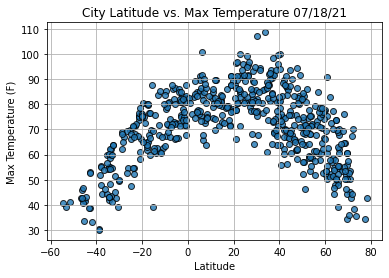

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

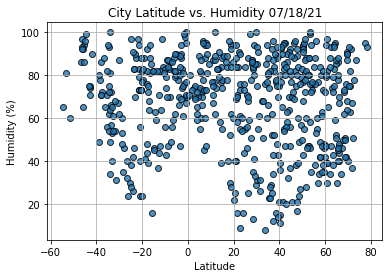

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


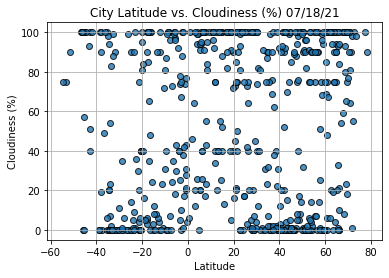

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

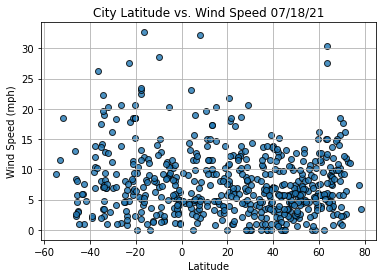

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
